In [1]:
import numpy as np
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets,metrics,linear_model
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [5]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
for i in train.columns:
    print(i,train[i].sort_values().unique(),'\n',sep='\n')

Loan_ID
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

In [8]:
for i in test.columns:
    print(i,test[i].sort_values().unique(),'\n',sep='\n')

Loan_ID
['LP001015' 'LP001022' 'LP001031' 'LP001035' 'LP001051' 'LP001054'
 'LP001055' 'LP001056' 'LP001059' 'LP001067' 'LP001078' 'LP001082'
 'LP001083' 'LP001094' 'LP001096' 'LP001099' 'LP001105' 'LP001107'
 'LP001108' 'LP001115' 'LP001121' 'LP001124' 'LP001128' 'LP001135'
 'LP001149' 'LP001153' 'LP001163' 'LP001169' 'LP001174' 'LP001176'
 'LP001177' 'LP001183' 'LP001185' 'LP001187' 'LP001190' 'LP001203'
 'LP001208' 'LP001210' 'LP001211' 'LP001219' 'LP001220' 'LP001221'
 'LP001226' 'LP001230' 'LP001231' 'LP001232' 'LP001237' 'LP001242'
 'LP001268' 'LP001270' 'LP001284' 'LP001287' 'LP001291' 'LP001298'
 'LP001312' 'LP001313' 'LP001317' 'LP001321' 'LP001323' 'LP001324'
 'LP001332' 'LP001335' 'LP001338' 'LP001347' 'LP001348' 'LP001351'
 'LP001352' 'LP001358' 'LP001359' 'LP001361' 'LP001366' 'LP001368'
 'LP001375' 'LP001380' 'LP001386' 'LP001400' 'LP001407' 'LP001413'
 'LP001415' 'LP001419' 'LP001420' 'LP001428' 'LP001445' 'LP001446'
 'LP001450' 'LP001452' 'LP001455' 'LP001466' 'LP001471

In [9]:
train['Dependents']=train['Dependents'].str.replace('+','')

C:\Users\dellpc\AppData\Local\Temp\ipykernel_4752\2094849518.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['Dependents']=train['Dependents'].str.replace('+','')


In [10]:
test['Dependents']=test['Dependents'].str.replace('+','')

C:\Users\dellpc\AppData\Local\Temp\ipykernel_4752\3917554881.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['Dependents']=test['Dependents'].str.replace('+','')


In [11]:
for i in train.columns:
    if train[i].dtype=="O":
        train[i].fillna(train[i].mode()[0],inplace=True)
    else:
        train[i].fillna(train[i].median(),inplace=True)

In [12]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
for i in test.columns:
    if test[i].dtype=="O":
        test[i].fillna(test[i].mode()[0],inplace=True)
    else:
        test[i].fillna(test[i].median(),inplace=True)

In [14]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [15]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
train['Dependents']=train['Dependents'].astype('int64')

In [17]:
test['Dependents']=test['Dependents'].astype('int64')

In [18]:
train['Loan_Status'].replace('Y','0',inplace=True)

In [19]:
train['Loan_Status'].replace('N','1',inplace=True)

In [20]:
train['Loan_Status']=train['Loan_Status'].astype('int64')

In [21]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [22]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [23]:
cat=[]
num=[]
for i in train.columns:
    if train[i].dtype=="O":
        cat.append(i)
    else:
        num.append(i)

In [24]:
cat

['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [25]:
num

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Loan_Status']

In [26]:
num.remove('Loan_Status')

In [27]:
train.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049,0.312704
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.463973
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,0.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


In [28]:
for i in cat:
    print(train[i].unique())

['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289' 'LP001

<AxesSubplot:>

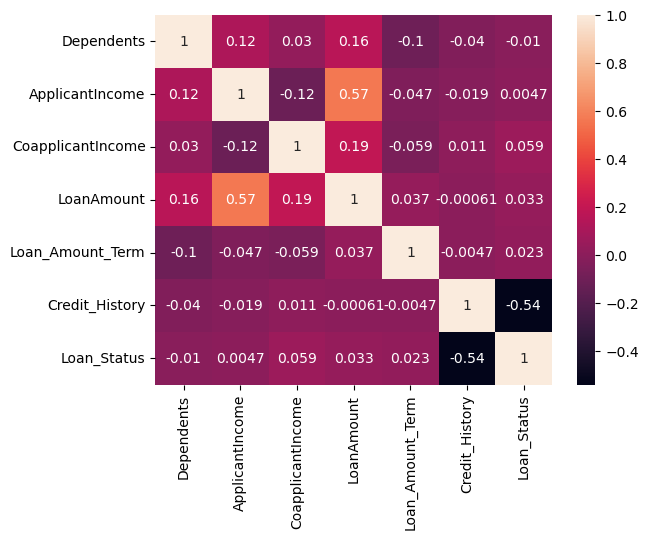

In [29]:
sns.heatmap(train.corr(),annot=True)

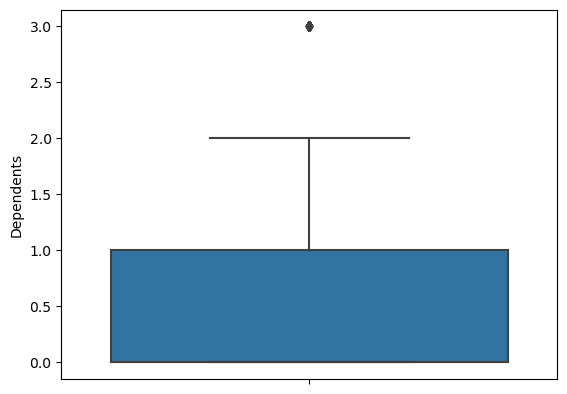

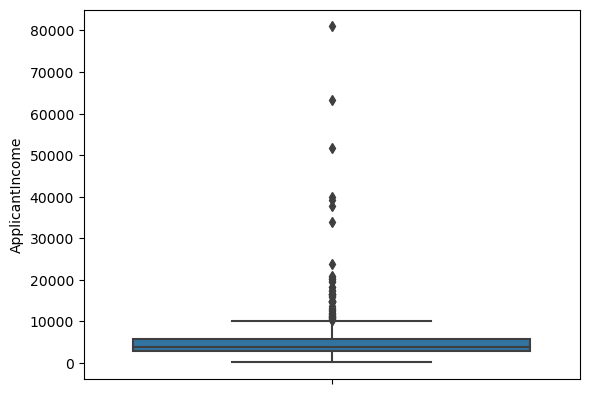

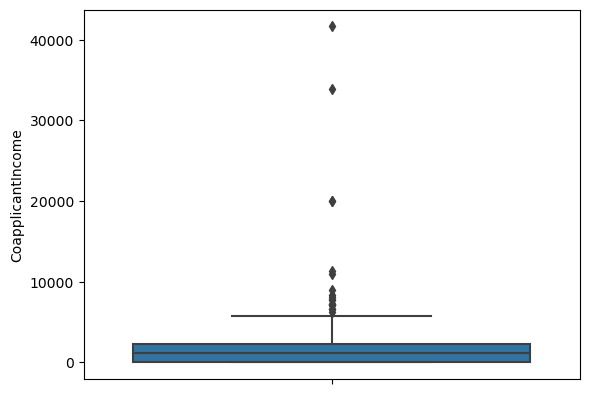

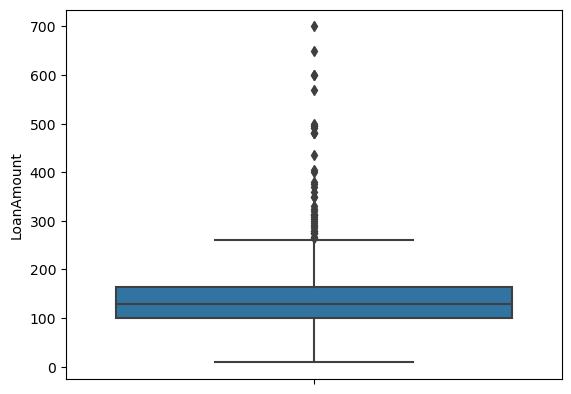

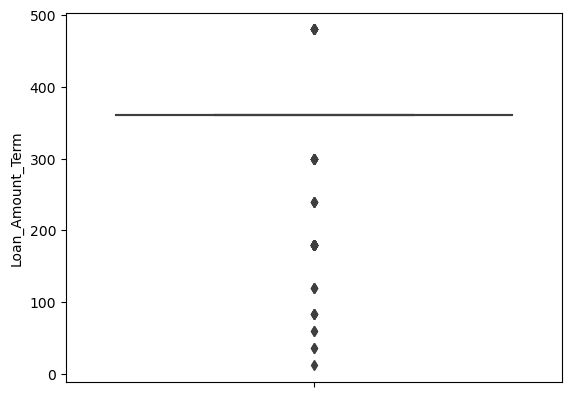

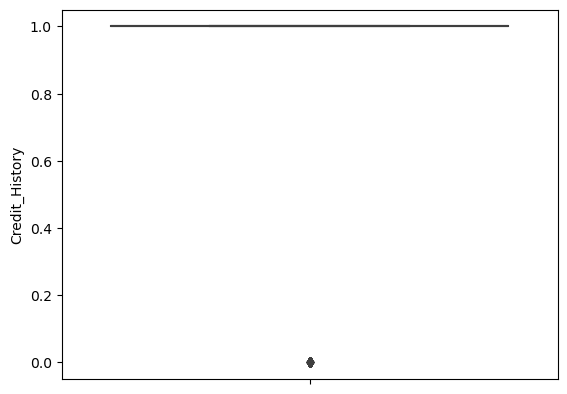

In [30]:
for i in num:
    plt.figure()
    sns.boxplot(y=i,data=train)

In [31]:
col=['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount']

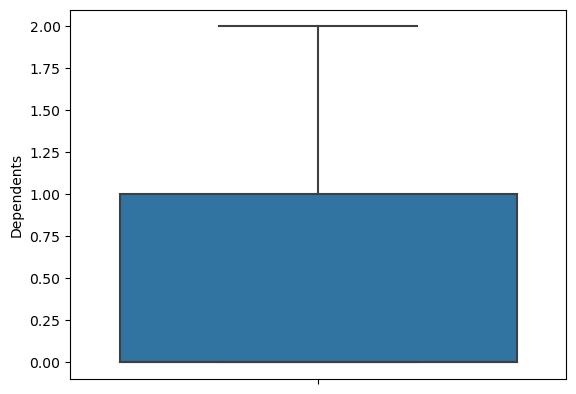

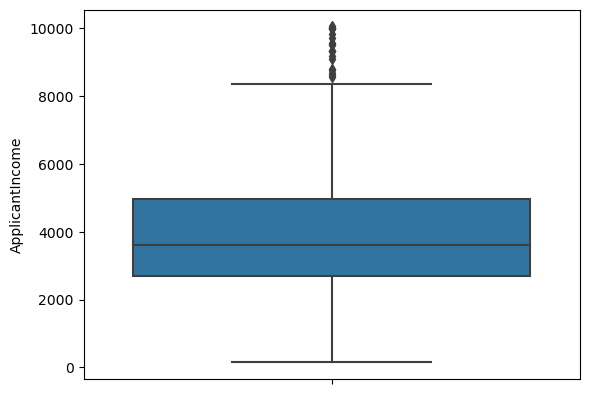

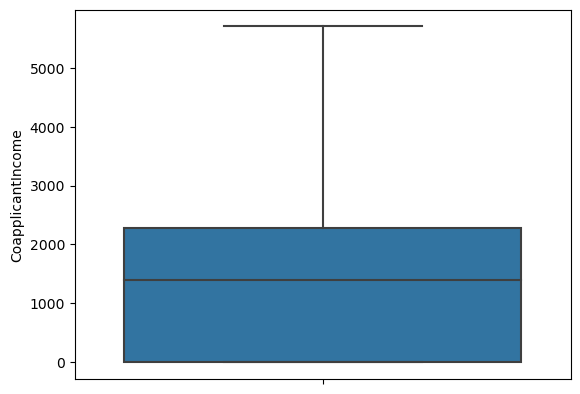

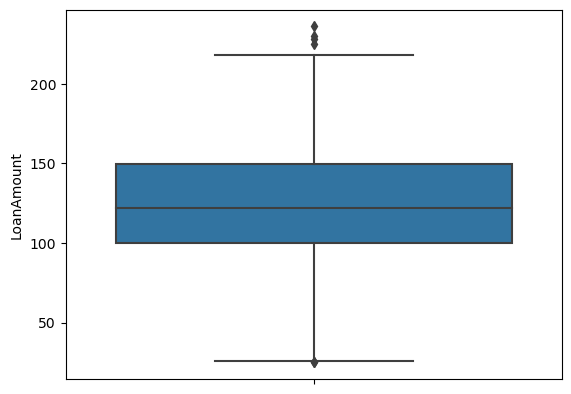

In [32]:
for i in col:
    q1=train[i].quantile(0.25)
    q3=train[i].quantile(0.75)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    train=train[(train[i]>ll) & (train[i]<ul)]
    plt.figure()
    sns.boxplot(data=train,y=i)

In [33]:
train.shape

(482, 13)

In [34]:
sc=StandardScaler()

In [35]:
train[num]=sc.fit_transform(train[num])

In [36]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,-0.674149,Graduate,No,1.055865,-0.956755,0.110774,0.251443,0.408742,Urban,0
1,LP001003,Male,Yes,0.610198,Graduate,No,0.350173,0.120388,0.110774,0.251443,0.408742,Rural,1
2,LP001005,Male,Yes,-0.674149,Graduate,Yes,-0.532222,-0.956755,-1.436129,0.251443,0.408742,Urban,0
3,LP001006,Male,Yes,-0.674149,Not Graduate,No,-0.764666,0.727532,-0.088826,0.251443,0.408742,Urban,0
4,LP001008,Male,No,-0.674149,Graduate,No,1.140036,-0.956755,0.435125,0.251443,0.408742,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,1.894546,Not Graduate,No,0.017951,0.051103,0.834326,0.251443,0.408742,Rural,0
608,LP002974,Male,Yes,-0.674149,Graduate,No,-0.402901,0.436103,-0.388227,0.251443,0.408742,Rural,0
609,LP002978,Female,No,-0.674149,Graduate,No,-0.587964,-0.956755,-1.311379,0.251443,0.408742,Rural,0
612,LP002984,Male,Yes,1.894546,Graduate,No,2.022430,-0.956755,1.582827,0.251443,0.408742,Urban,0


In [37]:
test[num]=sc.fit_transform(test[num])

In [38]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,-0.758222,Graduate,No,0.186461,-0.673335,-0.426780,0.266022,0.437674,Urban
1,LP001022,Male,Yes,0.181871,Graduate,No,-0.352692,-0.029848,-0.163953,0.266022,0.437674,Urban
2,LP001031,Male,Yes,1.121964,Graduate,No,0.039641,0.098849,1.183033,0.266022,0.437674,Urban
3,LP001035,Male,Yes,1.121964,Graduate,No,-0.502774,0.418877,-0.591047,0.266022,0.437674,Urban
4,LP001051,Male,No,-0.758222,Not Graduate,No,-0.311909,-0.673335,-0.952433,0.266022,0.437674,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,2.062056,Not Graduate,Yes,-0.162439,0.088982,-0.377500,0.266022,0.437674,Urban
363,LP002975,Male,Yes,-0.758222,Graduate,No,-0.132056,-0.369180,-0.344647,0.266022,0.437674,Urban
364,LP002980,Male,No,-0.758222,Graduate,No,-0.317211,0.181644,-0.163953,0.266022,0.437674,Semiurban
365,LP002986,Male,Yes,-0.758222,Graduate,No,0.039641,0.353241,0.361700,0.266022,0.437674,Rural


In [39]:
train=pd.get_dummies(train,columns=cat,drop_first=True)

In [40]:
test=pd.get_dummies(test,columns=cat,drop_first=True)

In [41]:
x=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [42]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [43]:
models={
    'Logistic Regression':LogisticRegression(random_state=2),
    'Decision Tree':DecisionTreeClassifier(criterion='entropy',random_state=16),
    'Random Forest':RandomForestClassifier(random_state=75)
}

Logistic Regression  :85.12%


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        87
           1       1.00      0.47      0.64        34

    accuracy                           0.85       121
   macro avg       0.91      0.74      0.77       121
weighted avg       0.88      0.85      0.83       121



AxesSubplot(0.125,0.11;0.62x0.77)


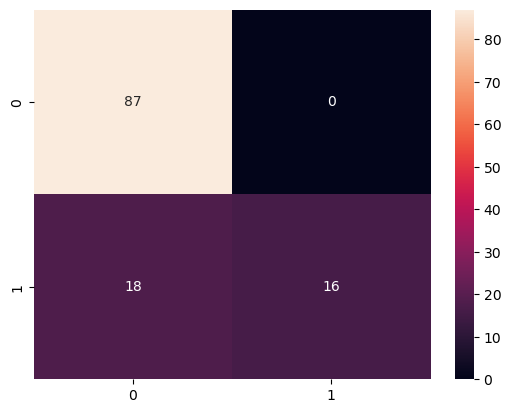

Decision Tree  :76.03%


              precision    recall  f1-score   support

           0       0.85      0.82      0.83        87
           1       0.57      0.62      0.59        34

    accuracy                           0.76       121
   macro avg       0.71      0.72      0.71       121
weighted avg       0.77      0.76      0.76       121



AxesSubplot(0.125,0.11;0.62x0.77)


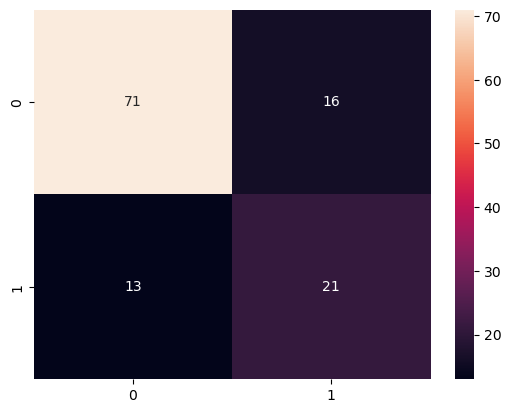

Random Forest  :84.30%


              precision    recall  f1-score   support

           0       0.82      1.00      0.90        87
           1       1.00      0.44      0.61        34

    accuracy                           0.84       121
   macro avg       0.91      0.72      0.76       121
weighted avg       0.87      0.84      0.82       121



AxesSubplot(0.125,0.11;0.62x0.77)


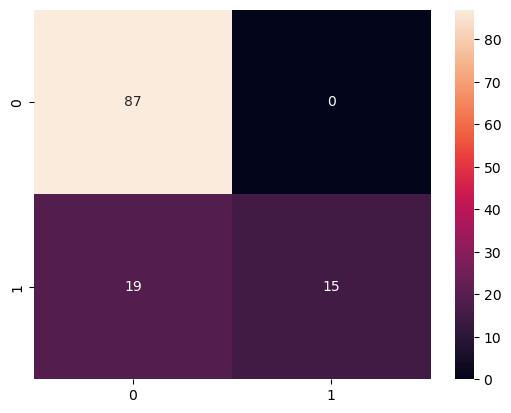

In [44]:
for name,model in models.items():
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(name,' :{:.2f}%'.format(accuracy_score(Y_test,Y_pred)*100))
    print('\n')
    print(classification_report(Y_test,Y_pred))
    print('\n')
    print(sns.heatmap(confusion_matrix(Y_test,Y_pred),fmt='g',annot=True))
    plt.show()